# Binary Classification of Diabetes Risk Using Machine Learning

## Project Overview


**Goal:**  
Predict the presence of diabetes using clinical health indicators, with emphasis on
understanding model trade-offs and minimizing false negatives.

**Dataset:**  
Pima Indians Diabetes Dataset (Kaggle)

**Key Challenges:**
- Class imbalance
- Cost of false negatives in healthcare settings

## Environment & Dependencies

This project was implemented in Python using standard data science and machine
learning libraries.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import kagglehub

In [ ]:
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'diabetes-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-dataset


## Data Preprocessing and Exploration

The dataset contains clinical features used to train machine learning models to predict whether a person has diabetes. The target variable is binary, with 1 indicating diabetes and 0 indicating no diabetes.

In [ ]:
df = pd.read_csv(f"{path}/diabetes.csv")
features = list(df.columns)
features.remove('Outcome')
X = df[features]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

display(df)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Model Benchmarking

Multiple classifiers were trained and evaluated using the same pipeline:
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- Logistic Regression
- Support Vector Machine

Models were compared using accuracy, precision, recall, and confusion matrices.


## K-Nearest Neighbors

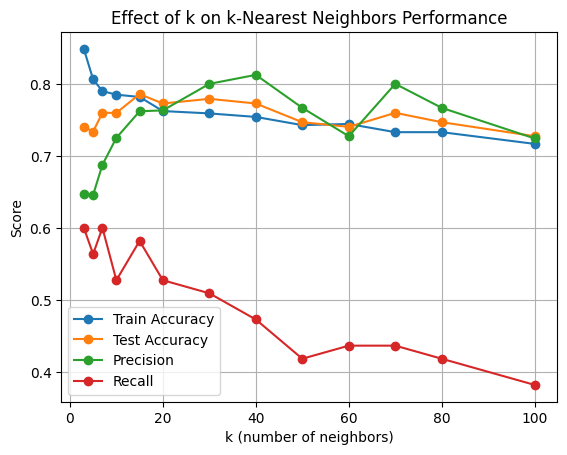

In [ ]:
n_neighbors_list = [3, 5, 7, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100]

train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
for k in n_neighbors_list:
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train, y_train)

  y_train_pred = knn_classifier.predict(X_train)
  y_test_pred = knn_classifier.predict(X_test)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  precision = precision_score(y_test, y_test_pred)
  recall = recall_score(y_test, y_test_pred)
  conf_matrix = confusion_matrix(y_test, y_test_pred)
  classification_rep = classification_report(y_test, y_test_pred)

  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
  precisions.append(precision)
  recalls.append(recall)

plt.plot(n_neighbors_list, train_accuracies, marker='o', label="Train Accuracy")
plt.plot(n_neighbors_list, test_accuracies, marker='o', label="Test Accuracy")
plt.plot(n_neighbors_list, precisions, marker='o', label="Precision")
plt.plot(n_neighbors_list, recalls, marker='o', label="Recall")

plt.xlabel("k (number of neighbors)")
plt.ylabel("Score")
plt.title("Effect of k on k-Nearest Neighbors Performance")
plt.legend()
plt.grid(True)
plt.show()

Based on the results, we can see how increasing the number of neighbors used in the KNN algorithm past 20 has limited improvements in the performance of the model. Using too many neighbors could lead to the model learning from too many datapoints that are too far away to be meaningful, and thus learning from noise and decreasing the performance of the model. The graph suggests that a value of around k = 10 is reasonable for balancing precision test accuracy, precision, and recall. However, a recall value of 0.6 or less is not ideal, especially in a healthcare context where we want to minimize false negatives.

## Decision Tree, Random Forest, Logistic Regression, Support Vector Machine

In [ ]:
experiments = [
  ("Decision Tree (gini)", DecisionTreeClassifier(criterion='gini', min_samples_split=25, random_state=1)),
  ("Decision Tree (entropy)", DecisionTreeClassifier(criterion='entropy', min_samples_split=25, random_state=1)),
  ("Random Forest (gini)", RandomForestClassifier(criterion='gini', min_samples_split=25, random_state=1)),
  ("Random Forest (entropy)", RandomForestClassifier(n_estimators=100,criterion='entropy', max_depth=15, min_samples_split=25, random_state=1)),
  ("Logistic Regression", LogisticRegression(solver='liblinear', random_state=1)),
  ("Support Vector Machine", SVC(random_state=1)),
  ("Linear Support Vector Machine", LinearSVC(random_state=1))
]

for name, classifier in experiments:
  classifier.fit(X_train, y_train)
  train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
  test_accuracy = accuracy_score(y_test, classifier.predict(X_test))
  precision = precision_score(y_test, classifier.predict(X_test))
  recall = recall_score(y_test, classifier.predict(X_test))
  conf_matrix = confusion_matrix(y_test, classifier.predict(X_test))
  classification_rep = classification_report(y_test, classifier.predict(X_test))

  metrics = {
    "train_accuracy": train_accuracy,
    "test_accuracy": test_accuracy,
    "test_precision": precision,
    "test_recall": recall
  }

  print(f'{name}:')
  for k, v in metrics.items():
    print(f"{k}: {v:.3f}")
  print(conf_matrix)
  print(classification_rep)
  print('\n')

Decision Tree (gini):
train_accuracy: 0.862
test_accuracy: 0.747
test_precision: 0.648
test_recall: 0.636
[[80 19]
 [20 35]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



Decision Tree (entropy):
train_accuracy: 0.873
test_accuracy: 0.701
test_precision: 0.588
test_recall: 0.545
[[78 21]
 [25 30]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        99
           1       0.59      0.55      0.57        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



Random Forest (gini):
train_accuracy: 0.866
test_accuracy: 0.805
test_precision: 0.778
te

## Hyperparameter Sensitivity Analysis

To understand model capacity and generalization, key Random Forest hyperparameters
were varied individually while holding others constant.


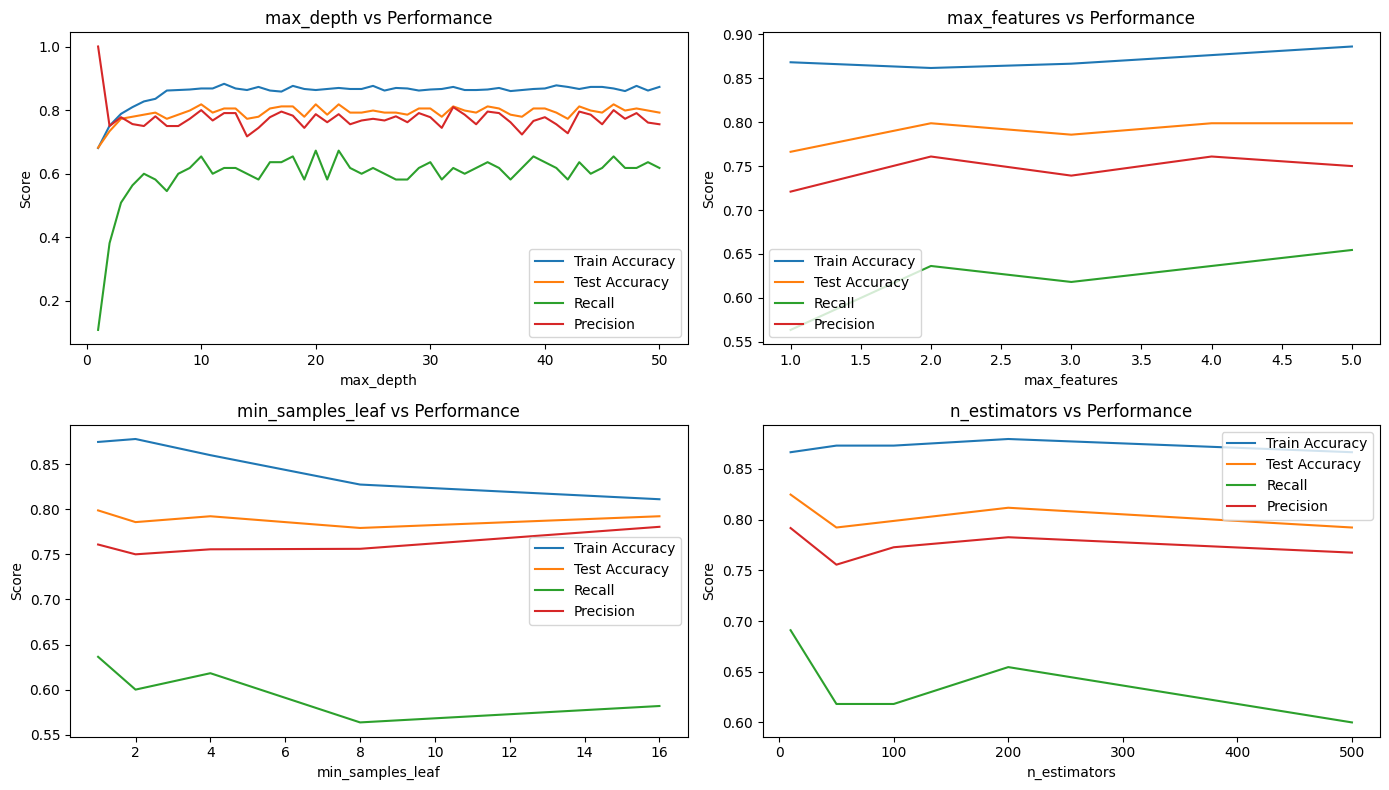

In [ ]:
base_params = {
    "n_estimators": 100,
    "max_depth": 15,
    "max_features": "sqrt",
    "min_samples_leaf": 1,
    "min_samples_split": 25,
}
experiments = [
    {
        "name": "max_depth",
        "values": range(1, 51)
    },
    {
        "name": "max_features",
        "values": [1, 2, 3, 4, 5]
    },
    {
        "name": "min_samples_leaf",
        "values": [1, 2, 4, 8, 16]
    },
    {
        "name": "n_estimators",
        "values": [10, 50, 100, 200, 500]
    }
]
n = len(experiments)
cols = 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

for ax, exp in zip(axes, experiments):
    param_name = exp["name"]
    values = exp["values"]

    train_accuracies = []
    test_accuracies = []
    precisions = []
    recalls = []

    for v in values:
        params = base_params.copy()
        params[param_name] = v

        rf = RandomForestClassifier(**params)
        rf.fit(X_train, y_train)

        y_train_pred = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)

        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
        recalls.append(recall_score(y_test, y_test_pred))
        precisions.append(precision_score(y_test, y_test_pred))

    ax.plot(values, train_accuracies, label="Train Accuracy")
    ax.plot(values, test_accuracies, label="Test Accuracy")
    ax.plot(values, recalls, label="Recall")
    ax.plot(values, precisions, label="Precision")
    ax.set_title(f'{param_name} vs Performance')
    ax.set_xlabel(param_name)
    ax.set_ylabel("Score")
    ax.legend()

for ax in axes[len(experiments):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

From the hyperparameter experiments, we can observe how each parameter affects the performance of the Random Forest Classifier. Increasing n_estimators beyond the default value of 100 did not improve performance and in some cases slightly decreased recall, suggesting that the default number of trees is sufficient for this dataset. For the other hyperparameters, the default values generally provided the best overall performance, indicating the model is relatively robust to these settings.